<a href="https://colab.research.google.com/github/RogerR81/VisDade_PAC02_RainCloudPlot/blob/main/PAC02_RainCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install ptitprince

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 14.6 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=2352e22815e88b977e77444b03d99002f715c1869ec5b9a9d8b05205bb0bc88d
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importo les llibreries necessàries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ptitprince as pt

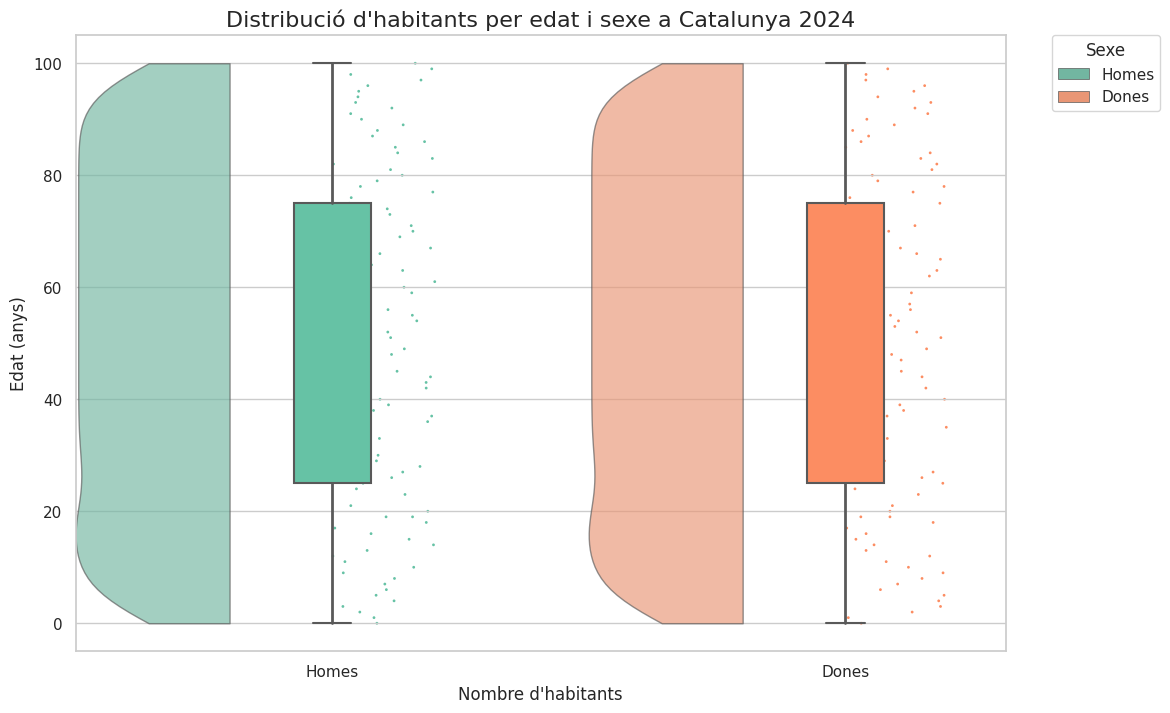

In [7]:
# Carrego les dades del fitxer
df = pd.read_csv('/content/drive/MyDrive/VisDades/PiramideCat.txt')

# Font: Institut d’Estadística de Catalunya ()

# COnverteixo les dades d'edat a enter (trec les paraules i modifico el tipus):
df['Etiqueta'] = df['Etiqueta'].str.replace(" anys", "", regex=False)
df['Etiqueta'] = df['Etiqueta'].str.replace(" any", "", regex=False)
df['Etiqueta'] = df['Etiqueta'].str.replace(" o més", "", regex=False)
df['Edat'] = df['Etiqueta'].astype(int)

# Transformo les dades per tenir les dades en format llarg:
df_long = df.melt(id_vars="Edat", value_vars=["Homes", "Dones"],
                  var_name="Sexe", value_name="Habitants")

# Ja puc crear el gràfic usant seaborn i ptitprince per les raindrops:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
pt.RainCloud(x="Sexe", y="Edat", data=df_long,
             hue="Sexe", orient="v", width_viol=0.6, width_box=0.15,
             point_size=2, alpha=0.65, move=0.1)

plt.title("Distribució d'habitants per edat i sexe a Catalunya 2024", fontsize=16)
plt.xlabel("Nombre d'habitants")
plt.ylabel("Edat (anys)")

plt.show()